In [1]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/badal/Downloads/archive (3)/Cotton Disease/train'
valid_path = 'C:/Users/badal/Downloads/archive (3)/Cotton Disease/test'

In [3]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#include_top=False cur the 1st and last layer last layer will predict the output

In [4]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False#as we are using the existing weights of image net so we dont to retrain again only at the last layer training should be done

In [5]:
  # useful for getting number of output classes
folders = glob('C:/Users/badal/Downloads/archive (3)/Cotton Disease/train*')

In [6]:
folders

['C:/Users/badal/Downloads/archive (3)/Cotton Disease\\train']

In [7]:
len(folders)

1

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
num_classes=4
prediction = Dense(num_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Users/badal/Downloads/archive (3)/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('C:/Users/badal/Downloads/archive (3)/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\badal\AppData\Local\Temp\ipykernel_9696\1716041270.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 263s 4s/step - loss: 0.6803 - accuracy: 0.7468 - val_loss: 0.3104 - val_accuracy: 0.8868
Epoch 2/20
61/61 [==============================] - 255s 4s/step - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.2051 - val_accuracy: 0.9434
Epoch 3/20
61/61 [==============================] - 252s 4s/step - loss: 0.1552 - accuracy: 0.9508 - val_loss: 0.2346 - val_accuracy: 0.8962
Epoch 4/20
61/61 [==============================] - 252s 4s/step - loss: 0.1240 - accuracy: 0.9580 - val_loss: 0.2121 - val_accuracy: 0.9434
Epoch 5/20
61/61 [==============================] - 248s 4s/step - loss: 0.1046 - accuracy: 0.9657 - val_loss: 0.1736 - val_accuracy: 0.9434
Epoch 6/20
61/61 [==============================] - 248s 4s/step - loss: 0.0992 - accuracy: 0.9621 - val_loss: 0.1217 - val_accuracy: 0.9528
Epoch 7/20
61/61 [==============================] - 248s 4s/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.1503 - val_accuracy: 0.9434
Epoch 8/20
61

In [19]:
import matplotlib.pyplot as plt

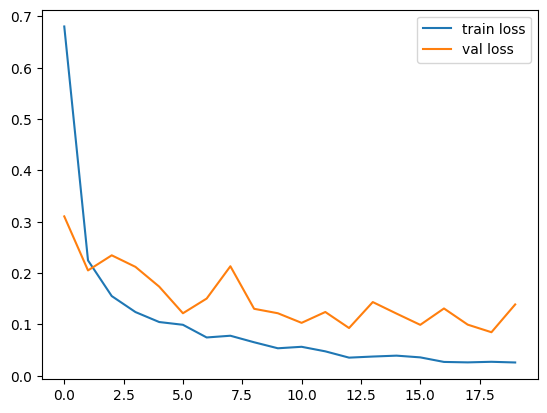

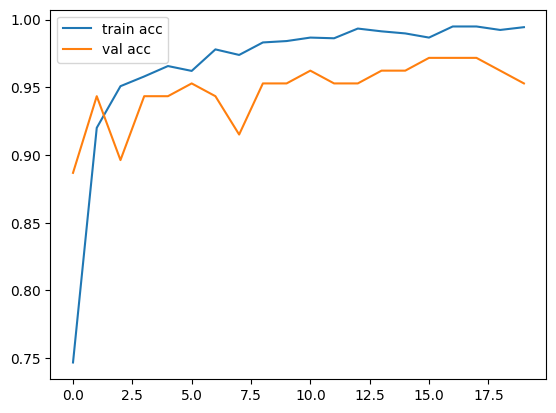

<Figure size 640x480 with 0 Axes>

In [20]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
y_pred = model.predict(test_set)

4/4 [==============================] - 15s 3s/step


In [22]:
y_pred

array([[1.84898943e-06, 5.73096285e-03, 2.50606092e-07, 9.94266987e-01],
       [5.43239585e-04, 3.83964896e-01, 7.49526254e-04, 6.14742219e-01],
       [6.82208474e-06, 1.32252099e-02, 5.76031336e-04, 9.86191869e-01],
       [6.50608882e-08, 9.99996960e-01, 9.45912348e-07, 1.91954609e-06],
       [1.95137522e-06, 3.15668667e-03, 4.08341350e-07, 9.96840894e-01],
       [1.34854872e-07, 9.99803782e-01, 1.55291616e-07, 1.95887071e-04],
       [9.70246911e-01, 4.21561526e-05, 2.79983394e-02, 1.71271071e-03],
       [9.91740465e-01, 7.14362614e-05, 8.18811078e-03, 7.47255324e-09],
       [9.99959052e-01, 3.00051779e-05, 1.08588983e-05, 6.50882948e-09],
       [9.08325455e-06, 9.92982209e-01, 4.19800756e-07, 7.00816978e-03],
       [3.02350521e-03, 4.12467052e-04, 9.96553421e-01, 1.05957224e-05],
       [2.31155264e-03, 3.05547610e-06, 9.97685075e-01, 3.27523651e-07],
       [3.10760342e-08, 9.99982893e-01, 1.36304072e-06, 1.57762970e-05],
       [3.49480688e-05, 9.99267697e-01, 1.33431809e